In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook",font_scale=1.2)
import pandas as pd
# disable setting with copy warning
pd.options.mode.chained_assignment = None
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pydicom

In [2]:
metrics = (
    f"test/old_subgroupAUROC", f"test/young_subgroupAUROC",
    f"test/female_subgroupAUROC", f"test/male_subgroupAUROC",
    f"test/AUROC"
)

In [3]:
def load_csvs_into_df(dir):
    dirs = [os.path.join(dir,d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
    dfs = []
    sample_dfs = []
    for d in dirs:
        seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
        # get last number from directory name
        train_loader_num = int(d.split('_')[-1])
        for seed in seeds:
            #print(os.path.join(d,seed))
            results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
            sample_info = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('train_loader')][0]
            results_df = pd.read_csv(os.path.join(d, seed, results))
            sample_df = pd.read_csv(os.path.join(d, seed, sample_info))
            results_df["train_loader_num"] = train_loader_num
            sample_df["train_loader_num"] = train_loader_num
            dfs.append(results_df)
            sample_dfs.append(sample_df)
    return pd.concat(dfs, ignore_index=True), pd.concat(sample_dfs, ignore_index=True)

In [4]:
df_1_fae_large, df_samples_1_fae_large= load_csvs_into_df('./2023-11-01 09:47:36-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples1-noDP')
df_1_fae_large["model"] = "FAE_large"

df_fae_small, df_samples_1_rd_small = load_csvs_into_df('./2023-11-01 08:50:49-FAE-rsna-balanced-bs32-balanced-dataset-distillation-nsamples1-noDP')
df_fae_small["model"] = "FAE_small"

In [5]:
min_train_loader_num = min(df_1_fae_large["train_loader_num"].max(), df_fae_small["train_loader_num"].max())
df_1_fae_large = df_1_fae_large.loc[df_1_fae_large["train_loader_num"] <= min_train_loader_num]
df_fae_small = df_fae_small.loc[y["train_loader_num"] <= min_train_loader_num]

In [6]:
df_1 = pd.concat([df_1_fae_large, df_fae_small], ignore_index=True)

In [7]:
df = df_1[[*metrics,'model']]
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
#df.metric = df.metric.str.replace(metrics[1], groups[1])
#df.metric = df.metric.str.replace(metrics[0], groups[0])
df.head()

,model,metric,value
0,FAE_large,test/old_subgroupAUROC,0.59355
1,FAE_large,test/old_subgroupAUROC,0.59410
2,FAE_large,test/old_subgroupAUROC,0.47660
3,FAE_large,test/old_subgroupAUROC,0.56185
4,FAE_large,test/old_subgroupAUROC,0.48945


value                                \
                                     count      mean       std       min   
model     metric                                                           
FAE_large test/AUROC                 718.0  0.531726  0.071160  0.295750   
          test/female_subgroupAUROC  718.0  0.505927  0.059901  0.274150   
          test/male_subgroupAUROC    718.0  0.557524  0.102951  0.278400   
          test/old_subgroupAUROC     718.0  0.556837  0.086433  0.279600   
          test/young_subgroupAUROC   718.0  0.506615  0.067364  0.305800   
FAE_small test/AUROC                 718.0  0.523929  0.070437  0.307975   
          test/female_subgroupAUROC  718.0  0.496512  0.059968  0.293700   
          test/male_subgroupAUROC    718.0  0.551346  0.102082  0.282750   
          test/old_subgroupAUROC     718.0  0.546363  0.084399  0.295250   
          test/young_subgroupAUROC   718.0  0.501495  0.067140  0.299600   

                                                                             
                                          25%       50%       75%       max  
model     metric                                                             
FAE_large test/AUROC                 0.483062  0.542962  0.588338  0.662825  
          test/female_subgroupAUROC  0.470887  0.510900  0.546788  0.637100  
          test/male_subgroupAUROC    0.485525  0.575700  0.644112  0.727500  
          test/old_subgroupAUROC     0.503838  0.570450  0.621850  0.718250  
          test/young_subgroupAUROC   0.457725  0.514375  0.562588  0.659500  
FAE_small test/AUROC                 0.474363  0.532406  0.578887  0.653075  
          test/female_subgroupAUROC  0.461875  0.501450  0.537600  0.642150  
          test/male_subgroupAUROC    0.478538  0.570700  0.636688  0.725900  
          test/old_subgroupAUROC     0.493012  0.557600  0.608800  0.705450  
          test/young_subgroupAUROC   0.453113  0.509125  0.555594  0.651700

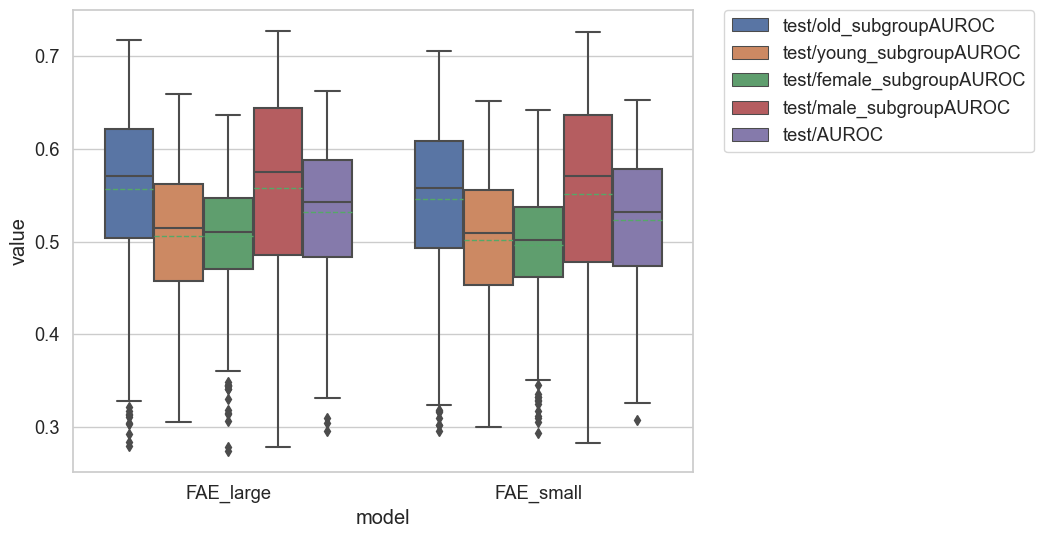

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()